In [1]:
import pandas as pd
import subprocess
import os
DWNLD_PATH = "/home/roberttoyonaga/notebooks/roberttoyonaga/CMUDeepLensNRC/HSTLens/full/full_"


batch_size = 20
start_point = int(input("starting point"))
CSV_PATH="test_csv" #shouldn't have to change


im_info = pd.read_csv(CSV_PATH)

def dwnld(entry): 
    subprocess.check_output(["wget", "-O",DWNLD_PATH+str(entry)+ ".fits" ,
                             "http://www.cadc-ccda.hia-iha.nrc-cnrc.gc.ca/data/pub/MAST/HST/product/"+
                             im_info['obj_name'][entry]+"_drz.fits"]) 
    
'''download image cutouts based on the file names'''
fails=0
for i in range(batch_size):
    print(i)
    try: 
        dwnld(i+int(start_point))
    except:
        fails+=1
        print("Failed")
        
    try:
        os.system('sextractor /home/roberttoyonaga/notebooks/roberttoyonaga/CMUDeepLensNRC/HSTLens/full/full_'+ str(i+start_point)+'.fits -c default1.se -CATALOG_NAME /home/roberttoyonaga/notebooks/roberttoyonaga/CMUDeepLensNRC/HSTLens/cat/image_'+str(i+start_point)+'.cat ')
    except:
        print('sextractor failed')
        continue
        

        
print("failed: "+str(fails))



starting point750
0
1
2
3
Failed
4
5
Failed
6
Failed
7
Failed
8
Failed
9
Failed
10
Failed
11
Failed
12
Failed
13
Failed
14
Failed
15
Failed
16
Failed
17
Failed
18
Failed
19
Failed
failed: 16


In [10]:
sp=756


SE_PATH = "/home/roberttoyonaga/notebooks/roberttoyonaga/CMUDeepLensNRC/HSTLens/cat/image_"+str(sp)+".cat"
DWNLD_PATH = "/home/roberttoyonaga/notebooks/roberttoyonaga/CMUDeepLensNRC/HSTLens/full/full_"

count=0
xl = []
yl =[]

f = open(SE_PATH,'r')
while (True):
    try:
        text = f.readline()
        if count>15:                     #change according to SE parameters
            words = text.split()
            xl.append(words[0])
            yl.append(words[1])
    except:
        break #breakout once the end is reached
    count+=1
import numpy as np
from astropy.nddata.utils import Cutout2D
from astropy.io import fits
from sklearn.preprocessing import minmax_scale


data, hdr = fits.getdata(DWNLD_PATH +str(sp)+ ".fits", 0, header=True) #load image into memory only once  (18s vs. 0.28s)

ims = np.zeros((len(xl),1, 100, 100))

for cutout in range(len(xl)):    
        centered_cut = Cutout2D(data,(float(xl[cutout]), float(yl[cutout])), (100, 100)).data # +random.randint(-15,15)

        centered_cut = np.nan_to_num(centered_cut)

#         if centered_cut.all() ==0:    #check for all Nan images 
#             bad_images.append(cutout)
#             continue

        if centered_cut.shape != (100, 100):    #check for cut off images
            result = np.zeros((100,100))
            result[:centered_cut.shape[0],:centered_cut.shape[1]] = centered_cut
            centered_cut = result
            
 #images should be 100x100
        ims[cutout][0] = centered_cut

IOError: [Errno 2] No such file or directory: '/home/roberttoyonaga/notebooks/roberttoyonaga/CMUDeepLensNRC/HSTLens/cat/image_756.cat'

In [16]:
# a= np.load('etg/etg_neg_norm_aug_dec10.npy')
a.max()

0.42550178344865824

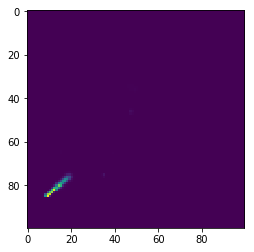

20|| logscale =18, log black=19, exit=20 , 210.1342926025390620


In [8]:
## inspection
from astropy.visualization import (ZScaleInterval, ImageNormalize)
from IPython import display
import os 
import matplotlib.pyplot as plt
import numpy as np
from astropy.io import fits
sp =0
PATH = "/home/roberttoyonaga/notebooks/roberttoyonaga/CMUDeepLensNRC/HSTLens/etg/etg_raw_dec10/"#/good_quality/"#HSTLens_detections/"
for i in range(len(ims)):
    try:  
        exit=False
        display.clear_output(wait=True)
        plt.imshow(ims[i+sp][0]) 
        plt.pause(0.20)
  
        while(1):

            ans = int(input(str(i)+"|| logscale =18, log black=19, exit=20 , "+str(ims[i][0].max())))
            
            if ans ==1:
                fits.writeto(PATH+"etg_"+str(sp)+"_" +str(i+sp)+'.fits',ims[i+sp][0], header=None, overwrite =True)
                break
            if ans==2:
                norm = ImageNormalize(ims[i+sp][0], interval = ZScaleInterval())
                plt.imshow(ims[i+sp][0],norm=norm)
                plt.pause(0.1)                
            if ans ==18:
                plt.imshow(np.log10(ims[i+sp][0]+1)) 
                plt.pause(0.1)
            if ans ==19:
                plt.imshow(np.log10(ims[i+sp][0]+1),cmap='gray') 
                plt.pause(0.1)
            if ans ==20:
                exit=True
                break
                
        if exit==True:
            break
    except:
        print("skipped due to non-existent image, or conversion error")

#     if exit==True:
#         break

## # 














# 20
## 











2



## 
## ## 
20